In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('placement.csv')

In [6]:
df

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0
...,...,...,...,...
95,95,4.3,200.0,0
96,96,4.4,42.0,0
97,97,6.7,182.0,1
98,98,6.3,103.0,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


In [9]:
df.shape

(100, 4)

In [10]:
df = df.iloc[:,1:]
# data preprosessing

In [11]:
df

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


## Steps

### 0. Preprocess + EDA + Feature Selection
### 1. Extract input and output cols
### 2. Scale the values
### 3. Train test split
### 4. Train the model
### 5. Evaluate the model/model selection
### 6. Deploy the model

In [12]:
import matplotlib.pyplot as plt

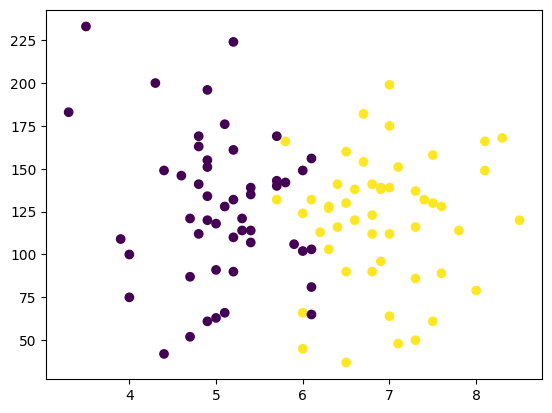

In [14]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])
# c is for color

In [15]:
x = df.iloc[0:,0:2]
y = df.iloc[:,2]

In [19]:
x.head()

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0


In [20]:
y.head()

0    1
1    0
2    0
3    1
4    0
Name: placement, dtype: int64

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.1)

In [25]:
x_train

,cgpa,iq
37,8.1,149.0
57,6.5,130.0
3,7.4,132.0
65,8.1,166.0
29,7.0,112.0
...,...,...
21,7.1,151.0
5,7.1,48.0
94,4.7,52.0
95,4.3,200.0


In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [27]:
x_train = scaler.fit_transform(x_train)

In [ ]:
x_train

In [30]:
x_test = scaler.transform(x_test)

In [32]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [33]:
model.fit(x_train,y_train)
# model training

LogisticRegression()

In [40]:
y_pred = model.predict(x_test)

In [41]:
y_test

55    1
18    0
31    0
22    0
71    1
84    0
73    0
32    1
33    0
40    0
Name: placement, dtype: int64

In [42]:
from sklearn.metrics import accuracy_score

In [43]:
accuracy_score(y_test,y_pred)

0.9

In [44]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

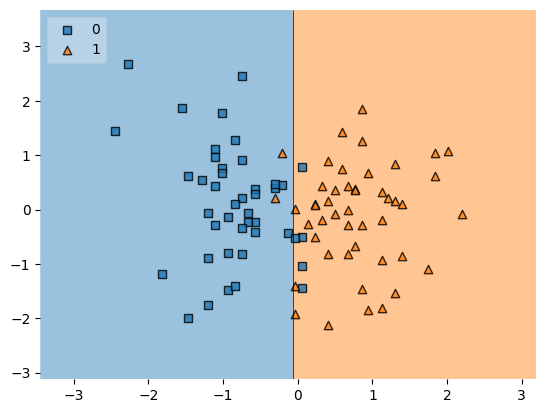

In [50]:
plot_decision_regions(x_train,y_train.values,clf=model,legend=2)
# plotting decision regions

In [51]:
import pickle

In [52]:
pickle.dump(model,open('model.pkl','wb'))